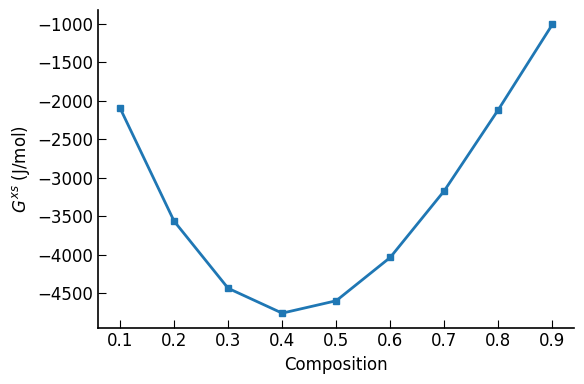

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pathlib import Path

# Directories
DATA_DIR = Path("../data")
FIG_DIR = Path("../figures")
FIG_DIR.mkdir(exist_ok=True)

# APS-style defaults
plt.rcParams.update({
    "xtick.direction": "in",
    "ytick.direction": "in",
    "xtick.major.size": 6,
    "ytick.major.size": 6,
    "axes.linewidth": 1.2,
    "font.size": 12,
})

# Load example CSV
df = pd.read_csv(DATA_DIR / "Table2_Gxs.csv")
x = df.iloc[:, 0]
y = df.iloc[:, 1]

fig, ax = plt.subplots(figsize=(6,4))
ax.plot(x, y, 's-', lw=2, markersize=5)

ax.set_xlabel("Composition")
ax.set_ylabel(r"$G^{xs}$ (J/mol)")

# ---- 1️⃣ Move x-axis to y=0 if negative values exist ----
ymin, ymax = y.min(), y.max()
if ymin < 0 and ymax > 0:
    # X-axis crosses y=0
    ax.spines['bottom'].set_position('zero')
else:
    # X-axis at bottom
    ax.spines['bottom'].set_position(('outward', 0))

# Y-axis always at left
ax.spines['left'].set_position(('outward', 0))

# ---- 2️⃣ Remove top and right spines ----
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# ---- 3️⃣ Ticks only left and bottom ----
ax.xaxis.set_ticks_position('bottom')
ax.yaxis.set_ticks_position('left')

# ---- 4️⃣ Grid OFF (APS style) ----
ax.grid(False)

# Tight layout and save
fig.tight_layout()
fig.savefig(FIG_DIR / "gxs_vs_composition.png", dpi=300)
plt.show()
